<h1>Linear Algebra (CpE210A)

<h3>Midterms Project

Coded and submitted by:<br>
<i>ANGELO, Jamaica Joy S.<br>
    201811828 <br>
   58010 </i>

Directions
This Jupyter Notebook will serve as your base code for your Midterm Project. You must further format and provide complete discussion on the given topic. 
- Provide all necessary explanations for specific code blocks. 
- Provide illustrations for key results.
- Observe clean code (intuitive variable names, proper commenting, proper code spacing)
- Provide a summary discussion at the end

Failure to use this format or failure to update the document will be given a deduction equivalent to 50% of the original score. 

### Case

Bebang is back to consult you about her business. Furthering her data analytics initiative she asks you for help to compute some relevant data. Now she is asking you to compute and visualize her sales and costs for the past year. She has given you the datasets attached to her request.

### Problem

State and explain Bebang's problem here and provide the deliverables.

# Proof of Concept

Now that you have a grasp on the requirements we need to start with making a program to prove that her problem is solvable. As a Linear Algebra student, we will be focusin on applying vector operations to meet her needs. First, we need to import her data. We will use the `pandas` library for this. For more information you can look into their documentation [here](https://pandas.pydata.org/).

In [107]:
import pandas as pd

file_prices = "bebang prices.csv"
file_sales = "bebang sales.csv"

df_prices = pd.read_csv(file_prices, index_col=0)
df_sales = pd.read_csv(file_sales)


## Let's check what's in df_prices
df_prices

,red velvet,oreo,sugar glazed,almond honey,matcha,strawberry cream,brown sugar boba,furits and nuts,dark chocolate,chocolate and orange,choco mint,choco butter naught
price per piece,35,25,20,35,50,40,40,45,30,40,45,45
cost per piece,25,15,10,20,35,31,30,25,15,25,32,31


In [108]:
## Let's check the sales dataframe
df_sales

,flavor,january,february,march,april,may,june,july,august,september,october,november,december
0,red velvet,781,524,364,157,894,56,89,41,23,78,231,899
1,oreo,210,324,344,32,123,1,3,0,1,6,312,548
2,sugar glazed,599,674,854,14,467,78,36,48,75,98,781,1602
3,almond honey,124,112,114,23,198,12,32,41,23,36,300,566
4,matcha,645,498,885,98,177,98,43,96,26,71,549,897
5,strawberry cream,210,372,369,78,163,26,45,22,54,41,207,456
6,brown sugar boba,981,380,154,14,147,15,98,33,23,36,552,633
7,furits and nuts,478,462,354,49,89,0,1,0,1,8,335,214
8,dark chocolate,598,203,36,96,789,4,5,0,8,0,789,458
9,chocolate and orange,324,123,48,32,65,74,78,45,89,100,632,231


## Part 1: Monthly Sales

In [109]:
import numpy as np
### Vectorizing the data

sales_mat = np.array(df_sales.set_index('flavor','total'))
prices_mat = np.array(df_prices)[0].reshape((12,1))
costs_mat = np.array(df_prices)[1].reshape((12,1)) 
#.reshape(): this reshapes the array without changing the data.

## Do not alter these lines
print(sales_mat.shape)
print(prices_mat.shape)
print(costs_mat.shape)
# Expected Output
# (12, 12)
# (12, 1)
# (12, 1)

(12, 12)
(12, 1)
(12, 1)


#### Formulas

Take note that the fomula for revenue is: <br>
$revenue = sales * price $ <br>
In this case, think that revenue, sales, and price are vectors instead of individual values <br>
The formula of cost per item sold is: <br>
$cost_{sold} = sales * cost$ <br>
The formula for profit is: <br>
$profit = revenue - cost_{sold}$ <br>
Solving for the monthly profit will be the sum of all profits made on that month.

In [110]:
#Create a function that *returns* and prints the monthly sales and profit for each month 
def monthly_sales(price, cost, sales):
    
    monthly_revenue = np.dot(np.transpose(prices_mat), sales_mat) # calculates the monthly revenue
    monthly_costs =  np.dot(np.transpose(costs_mat), sales_mat)  # calculates the monthly cost sold
    monthly_profits = monthly_revenue - monthly_costs  # calculates the monthly profits of each item
    return monthly_revenue.flatten(), monthly_costs.flatten(), monthly_profits.flatten()

In [111]:
month_rev, month_cost, month_profit = monthly_sales(prices_mat, costs_mat, sales_mat)

### PRINTING THE VALUES:
print(f'MONTHLY REVENUE FROM JANUARY TO DECEMBER OF BEBANGS DONUTS: \n{month_rev}\n'
      f'\nMONTHLY COSTS FROM JANUARY TO DECEMBER OF BEBANGS DONUTS: \n{month_cost}\n'
      f'\nMONTHLY PROFIT FROM JANUARY TO DECEMBER OF BEBANGS DONUTS: \n{month_profit}')

MONTHLY REVENUE FROM JANUARY TO DECEMBER OF BEBANGS DONUTS: 
[236825 175530 159045  30335 150085  16735  17970  16995  14960  21590
 213655 347365]

MONTHLY COSTS FROM JANUARY TO DECEMBER OF BEBANGS DONUTS: 
[157454 116322 105195  20334  97261  11208  12372  11497   9926  14377
 137107 230209]

MONTHLY PROFIT FROM JANUARY TO DECEMBER OF BEBANGS DONUTS: 
[ 79371  59208  53850  10001  52824   5527   5598   5498   5034   7213
  76548 117156]


## Part 2: Flavor Sales

In [112]:
#Create a function that *returns* and prints the flavor profits for the whole year 
def flavor_sales(price, cost, sales):
    
    flavor_revenue = np.array([
        sum((sales_mat[0,:]) * (prices_mat[0,0])),
        sum((sales_mat[1,:]) * (prices_mat[1,0])),
        sum((sales_mat[2,:]) * (prices_mat[2,0])),
        sum((sales_mat[3,:]) * (prices_mat[3,0])),
        sum((sales_mat[4,:]) * (prices_mat[4,0])),
        sum((sales_mat[5,:]) * (prices_mat[5,0])),
        sum((sales_mat[6,:]) * (prices_mat[6,0])),
        sum((sales_mat[7,:]) * (prices_mat[7,0])),
        sum((sales_mat[8,:]) * (prices_mat[8,0])),
        sum((sales_mat[9,:]) * (prices_mat[9,0])),
        sum((sales_mat[10,:]) * (prices_mat[10,0])),
        sum((sales_mat[11,:]) * (prices_mat[11,0])),
    ])
    flavor_costs = np.array([
        sum((sales_mat[0,:]) * (costs_mat[0,0])),
        sum((sales_mat[1,:]) * (costs_mat[1,0])),
        sum((sales_mat[2,:]) * (costs_mat[2,0])),
        sum((sales_mat[3,:]) * (costs_mat[3,0])),
        sum((sales_mat[4,:]) * (costs_mat[4,0])),
        sum((sales_mat[5,:]) * (costs_mat[5,0])),
        sum((sales_mat[6,:]) * (costs_mat[6,0])),
        sum((sales_mat[7,:]) * (costs_mat[7,0])),
        sum((sales_mat[8,:]) * (costs_mat[8,0])),
        sum((sales_mat[9,:]) * (costs_mat[9,0])),
        sum((sales_mat[10,:]) * (costs_mat[10,0])),
        sum((sales_mat[11,:]) * (costs_mat[11,0])),
    ])
    flavor_profits = flavor_revenue - flavor_costs
    return flavor_profits.flatten()

In [113]:
flavor_profit = flavor_sales(prices_mat, costs_mat, sales_mat)

### print the values
print(f'FLAVOR PROFIT FOR THE WHOLE YEAR: \n', flavor_profit)

FLAVOR PROFIT FOR THE WHOLE YEAR: 
 [41370 19040 53260 23715 61245 18387 30660 39820 44790 27615 26156 91770]


In [127]:
df_sales['Total_Sales'] = [sales_mat.sum(axis = 1)[0],sales_mat.sum(axis = 1)[1],sales_mat.sum(axis = 1)[2]
,sales_mat.sum(axis = 1)[3],sales_mat.sum(axis = 1)[4],sales_mat.sum(axis = 1)[5],sales_mat.sum(axis = 1)[6]
,sales_mat.sum(axis = 1)[7],sales_mat.sum(axis = 1)[9],sales_mat.sum(axis = 1)[9],sales_mat.sum(axis = 1)[10]
,sales_mat.sum(axis = 1)[11]]

In [93]:
df_sales

,flavor,january,february,march,april,may,june,july,august,september,october,november,december,Total_Sales,Total Sales,flavor_profit
0,red velvet,781,524,364,157,894,56,89,41,23,78,231,899,4137,4137,4137
1,oreo,210,324,344,32,123,1,3,0,1,6,312,548,1904,1904,1904
2,sugar glazed,599,674,854,14,467,78,36,48,75,98,781,1602,5326,5326,5326
3,almond honey,124,112,114,23,198,12,32,41,23,36,300,566,1581,1581,1581
4,matcha,645,498,885,98,177,98,43,96,26,71,549,897,4083,4083,4083
5,strawberry cream,210,372,369,78,163,26,45,22,54,41,207,456,2043,2043,2043
6,brown sugar boba,981,380,154,14,147,15,98,33,23,36,552,633,3066,3066,3066
7,furits and nuts,478,462,354,49,89,0,1,0,1,8,335,214,1991,1991,1991
8,dark chocolate,598,203,36,96,789,4,5,0,8,0,789,458,1841,1841,1841
9,chocolate and orange,324,123,48,32,65,74,78,45,89,100,632,231,1841,1841,1841


In [133]:
monthly_sales = sales_mat

monthly_sales = {'MONTH':['January','February','March','April','May','June',
                       'July','August','September','October','November','December']
              ,'SALES':[df_sales.sum(axis = 0)[1],df_sales.sum(axis = 0)[2],df_sales.sum(axis = 0)[3],
                        df_sales.sum(axis = 0)[4],df_sales.sum(axis = 0)[5],df_sales.sum(axis = 0)[6],
                        df_sales.sum(axis = 0)[7],df_sales.sum(axis = 0)[8],df_sales.sum(axis = 0)[9],
                        df_sales.sum(axis = 0)[10],df_sales.sum(axis = 0)[11],df_sales.sum(axis = 0)[12]]}

pd.DataFrame(data = monthly_sales)

,MONTH,SALES
0,January,6186
1,February,4670
2,March,4245
3,April,771
4,May,4177
5,June,434
6,July,469
7,August,423
8,September,403
9,October,574


In [86]:
# USING THE SORT FUNCTION:
sort_flavors = sorted(df_sales.Total_Sales, reverse = True)

# THE BEST 3 FLAVORS:
best_3_flavors = {'BEST 3 FLAVORS':['choco butter naught','sugar glazed','red velvet'],
             'SALES':[sort_flavors[0],sort_flavors[1],sort_flavors[2]]}
pd.DataFrame(data = best_3_flavors)

,BEST 3 FLAVORS,SALES
0,choco butter naught,6555
1,sugar glazed,5326
2,red velvet,4137


In [68]:
# THE WORST 3 FLAVORS:
worst_3_flavors = {'WORST 3 FLAVORS':['dark chocolate','chocolate and orange','almond honey']
              ,'SALES':[sorted_flavor[9],sorted_flavor[10],sorted_flavor[11]]}

pd.DataFrame(data = worst_3_flavors)

,WORST 3 FLAVORS,SALES
0,dark chocolate,1841
1,chocolate and orange,1841
2,almond honey,1581


## Part 3: Visualizing the Data (Optional for +40%)
You can try to visualize the data in the most comprehensible chart that you can use.

In [102]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

%matplotlib inline

#### Entire Dataset

#### Monthly Sales

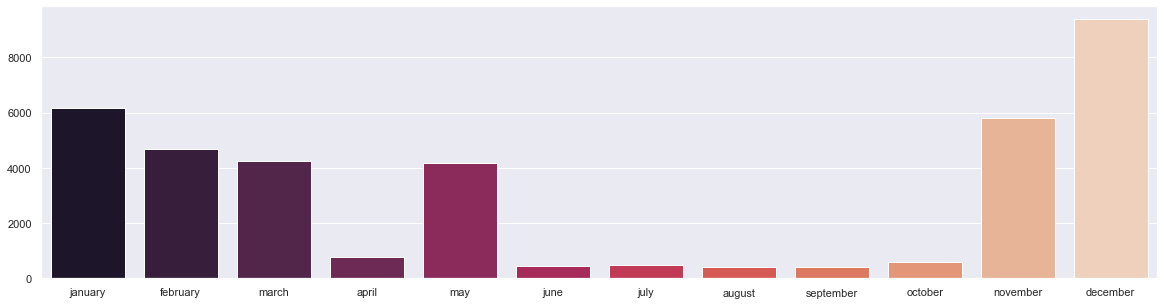

In [152]:
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot("month","sales", data = monthly_sale, palette = "rocket")

#### Flavor Sales

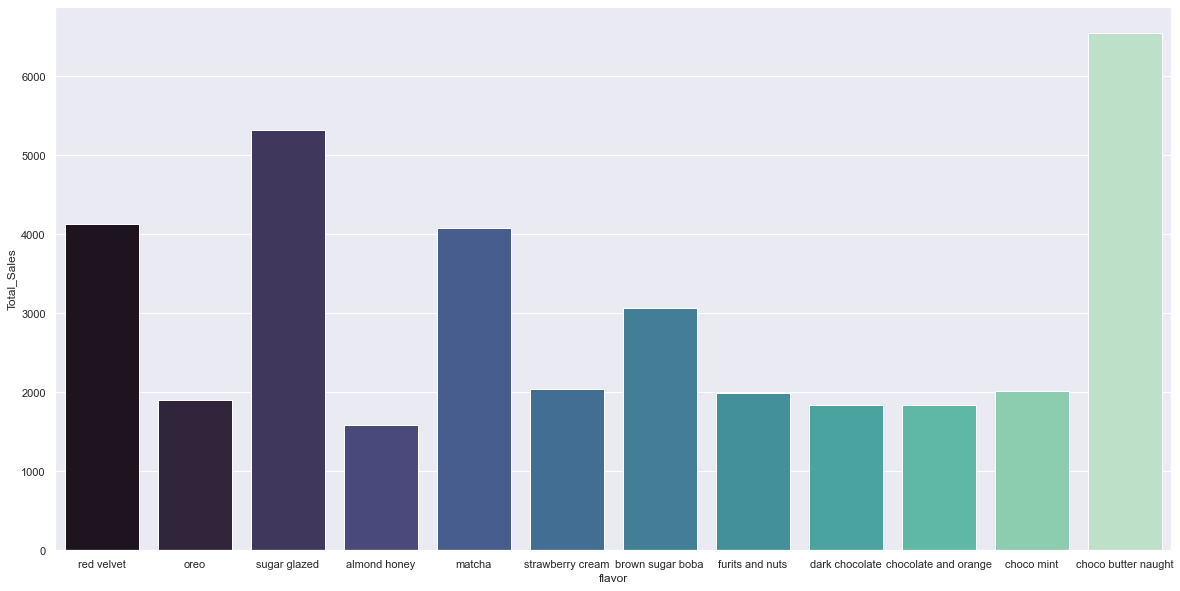

In [153]:
sns.set(rc={'figure.figsize':(20,10)})
sns.barplot("flavor","Total_Sales",data = df_sales, palette = "mako")

## Part 4: Business Recommendation and Conclusion
Present the findings of your data analysis and provide recommendations

Beba Ng's Monthly revenue as what has been computed for the months of January - December are:
- <b>January: </b>236,825 
- <b>February: </b> 175,530                
- <b>March: </b>159,045
- <b>April: </b>30,335
- <b>May: </b>150,085
- <b>June: </b>16,735
- <b>July: </b>17,970
- <b>August: </b>16,995
- <b>September: </b>14,960
- <b>October: </b>21,590
- <b>November: </b>213,655
- <b>December: </b>347,365

Beba Ng's <i>total revenue</i> for the whole year would be <b>1,401,090</b> as per calculated via the summation of each monthly revenues. As for her Monthly Costs for the whole year are the following:
- <b>January: </b>157,454 
- <b>February: </b> 116,322                
- <b>March: </b>105,195
- <b>April: </b>320,334
- <b>May: </b>97,261
- <b>June: </b>11,208
- <b>July: </b>12,372
- <b>August: </b>11,497
- <b>September: </b>9,926
- <b>October: </b>14,377
- <b>November: </b>137,107
- <b>December: </b>230,209

Beba Ng's <i>total <b>profit</b></i> for the whole year would be <b>1,223,262</b> as per calculated via the summation of each monthly costs of her products. For her monthly profit for the whole year round are:                           
- <b>January: </b>79,371 
- <b>February: </b> 59,208               
- <b>March: </b>53,850
- <b>April: </b>10,001
- <b>May: </b>52,824
- <b>June: </b>5,527
- <b>July: </b>5,598
- <b>August: </b>5,498
- <b>September: </b>5,034
- <b>October: </b>7,213
- <b>November: </b>76,548
- <b>December: </b>117,156

With her profit for the whole year being <b>477,828</b>. With these calculated data, one could say that Beba Ng's Donut Shop is having a bad year and she's not an exception in 2020's wrath. This means that her profit for the whole year is not that good even though her some of her products are selling wuite exceptionally high. Her business is having such hard time to sell her flacored donuts in the months of <b>April, June, July, August, September,</b> and <b>October</b>. I could say that these months are really not the <i>peak season</i> because it's typhoon season where people would rather stay at home than to go out and buy donuts unlike in the months of January, February, March, May, November, and December where there are such occasions like New Year, Valentines Day, and Christmas. These seasons are the booming seasons where people celebrate and buy the donuts to give their loved ones. But she could improve her marketing strategy by introducing new flavors that may pique the interests of her customers and removing the flavors that are not really selling that much. Beba Ng may also introduce discounts like buy 1 take 1s or giving out coupons so that the worst flavors may have a little boost in sales and profit. I hope that Beba Ng will consider the recommendations that I laid out in order for her sales and profits go reach their peak.